In [77]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import missingno as msno
import skimpy as skp
from skimpy import skim

In [78]:

df = pd.read_csv(r"C:\Job\MLE\Forecasting-of-revenues-to-the-budget-of-the-Russian-Federation\data\dataset.csv", engine='python', encoding='utf-8')
df

,Year,oil_prices(barrel/USD),gas_prices(MMBtu/USD),Oil_production_volume(million_b/y),Gas_production_volume(billion_c_m/y),Oil_export_volume(million tons),Gas_export_volume(billion_c_m),Share_of_oil_and_gas_revenues(%),TB(billion USD),FDI(billion USD),...,Gini_coefficient(%),population_size(p),unemployment_rate(%),per_c_i(thousands/USD),Non_oil_GDP(%),CPI,Military_expenditures(% of GDP),tax_rates(VAT%),tax_rates(PIT%),tax_receipts(billion USD)
0,1991,26.05,1.76,10.340,643.0,129.5,210.0,18,10.30,NaN,...,26.0,148390433,5.0,3.19,82.0,NaN,5.1,28.0,12–60,17
1,1992,16.55,1.40,2.925,641.0,111.8,200.0,20,10.30,NaN,...,29.0,148915991,5.2,10.10,80.0,NaN,4.8,28.1,12–60,18
2,1993,16.30,1.80,2.595,618.0,99.2,190.0,22,10.30,NaN,...,40.0,148135424,5.9,8.80,81.0,NaN,7.0,28.2,12–50,15
3,1994,12.35,1.60,2.331,607.0,88.9,185.0,18,10.30,-500.0,...,41.0,148200736,8.1,8.80,80.0,NaN,6.5,28.3,12–45,14
4,1995,16.40,1.50,2.250,595.0,85.9,180.0,16,10.30,-2000.0,...,38.0,148291403,8.3,9.10,79.0,2.4,6.0,28.4,12–40,13
5,1996,19.47,1.90,2.206,601.0,84.2,182.0,18,10.30,2000.0,...,46.1,148084582,9.3,9.30,78.0,2.6,5.5,28.5,12–35,12
6,1997,20.50,2.10,2.243,571.0,85.6,175.0,19,10.30,4000.0,...,38.4,147853771,10.8,10.50,77.0,2.3,4.0,28.6,12–35,11
7,1998,12.00,1.80,2.221,591.0,84.7,178.0,15,10.30,0.0,...,38.1,147635531,11.9,8.50,79.0,2.4,3.5,28.7,12–35,8
8,1999,18.50,2.20,2.236,592.0,85.3,180.0,20,10.30,2000.0,...,37.4,147241975,13.0,7.00,81.0,2.2,4.2,28.8,12–30,10
9,2000,26.20,3.60,2.375,585.0,90.6,185.0,27,58.35,1000.0,...,37.1,146717782,10.6,8.50,79.0,2.4,5.4,28.9,12–30,15


In [79]:
print("Размерность датасета", df.shape)
df.columns


Размерность датасета (35, 29)


Index(['Year', 'oil_prices(barrel/USD)', 'gas_prices(MMBtu/USD)',
       'Oil_production_volume(million_b/y)',
       'Gas_production_volume(billion_c_m/y)',
       'Oil_export_volume(million tons)', 'Gas_export_volume(billion_c_m)',
       'Share_of_oil_and_gas_revenues(%)', 'TB(billion USD)',
       'FDI(billion USD)', 'Import_volume(billion USD)', 'Key_rate(%)',
       'level_of_public_debt(% of GDP)', 'tock_Market_Index(MOEX Index)',
       'inflation_rate(%)', 'exchange_rates(RUB/USD)', 'GNP(milliard USD)',
       'ISI(0-10)', 'Migration_rate(net_migration th/p)',
       'Gini_coefficient(%)', 'population_size(p)', 'unemployment_rate(%)',
       'per_c_i(thousands/USD)', 'Non_oil_GDP(%)', 'CPI',
       'Military_expenditures(% of GDP)', 'tax_rates(VAT%)', 'tax_rates(PIT%)',
       'tax_receipts(billion USD)'],
      dtype='object')

#EDA
Проверка типов данных
Просмотр первых и последних строк 
Общая статистика
Проверка дубликатов

In [80]:
print(df.dtypes)

display(df.head())

display(df.tail())

skim(df)

dubl = df.duplicated().sum()
dubl

Year                                      int64
oil_prices(barrel/USD)                  float64
gas_prices(MMBtu/USD)                   float64
Oil_production_volume(million_b/y)      float64
Gas_production_volume(billion_c_m/y)    float64
Oil_export_volume(million tons)         float64
Gas_export_volume(billion_c_m)          float64
Share_of_oil_and_gas_revenues(%)          int64
TB(billion USD)                         float64
FDI(billion USD)                        float64
Import_volume(billion USD)              float64
Key_rate(%)                             float64
level_of_public_debt(% of GDP)            int64
tock_Market_Index(MOEX Index)           float64
inflation_rate(%)                       float64
exchange_rates(RUB/USD)                 float64
GNP(milliard USD)                         int64
ISI(0-10)                               float64
Migration_rate(net_migration th/p)      float64
Gini_coefficient(%)                     float64
population_size(p)                      

,Year,oil_prices(barrel/USD),gas_prices(MMBtu/USD),Oil_production_volume(million_b/y),Gas_production_volume(billion_c_m/y),Oil_export_volume(million tons),Gas_export_volume(billion_c_m),Share_of_oil_and_gas_revenues(%),TB(billion USD),FDI(billion USD),...,Gini_coefficient(%),population_size(p),unemployment_rate(%),per_c_i(thousands/USD),Non_oil_GDP(%),CPI,Military_expenditures(% of GDP),tax_rates(VAT%),tax_rates(PIT%),tax_receipts(billion USD)
0,1991,26.05,1.76,10.340,643.0,129.5,210.0,18,10.3,NaN,...,26.0,148390433,5.0,3.19,82.0,NaN,5.1,28.0,12–60,17
1,1992,16.55,1.40,2.925,641.0,111.8,200.0,20,10.3,NaN,...,29.0,148915991,5.2,10.10,80.0,NaN,4.8,28.1,12–60,18
2,1993,16.30,1.80,2.595,618.0,99.2,190.0,22,10.3,NaN,...,40.0,148135424,5.9,8.80,81.0,NaN,7.0,28.2,12–50,15
3,1994,12.35,1.60,2.331,607.0,88.9,185.0,18,10.3,-500.0,...,41.0,148200736,8.1,8.80,80.0,NaN,6.5,28.3,12–45,14
4,1995,16.40,1.50,2.250,595.0,85.9,180.0,16,10.3,-2000.0,...,38.0,148291403,8.3,9.10,79.0,2.4,6.0,28.4,12–40,13


,Year,oil_prices(barrel/USD),gas_prices(MMBtu/USD),Oil_production_volume(million_b/y),Gas_production_volume(billion_c_m/y),Oil_export_volume(million tons),Gas_export_volume(billion_c_m),Share_of_oil_and_gas_revenues(%),TB(billion USD),FDI(billion USD),...,Gini_coefficient(%),population_size(p),unemployment_rate(%),per_c_i(thousands/USD),Non_oil_GDP(%),CPI,Military_expenditures(% of GDP),tax_rates(VAT%),tax_rates(PIT%),tax_receipts(billion USD)
30,2021,69.00,4.0,3.841,762.3,146.5,251.0,35,10.30,40000.0,...,35.1,145836175,4.8,46.3,82.6,29.0,4.1,20.1,13-15,340
31,2022,76.09,18.0,3.914,672.0,149.3,176.0,45,33.24,-25000.0,...,39.5,145579899,4.0,40.5,82.0,28.0,4.1,20.2,13-15,400
32,2023,62.99,9.0,3.834,638.0,146.2,180.0,30,10.30,-10000.0,...,40.5,145440500,3.2,35.3,83.5,26.0,5.9,20.3,13-15,300
33,2024,NaN,7.0,3.344,685.0,127.6,185.0,30,11.80,-5000.0,...,40.8,144820423,2.5,35.0,84.0,22.0,7.1,20.4,13-15,280
34,2025,NaN,NaN,3.594,695.4,137.1,190.0,25,9.50,NaN,...,41.1,143997393,NaN,36.0,84.5,22.0,7.2,20.5,13-15,290


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 35     │ │ float64     │ 22    │                                                          │
│ │ Number of columns │ 29     │ │ int64       │ 6     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column   ┃ NA ┃ NA %     ┃ mean    ┃ sd      ┃ p0       ┃ p25     ┃ p50      ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Year     │  0 │        0 │    2008 │   10.25 │     1991 │    2000 │     2008 │    2016 │     2025 │ ▇▇▇▇▇▇ │  │
│ │ oil_pric │  2 │ 5.714285 │   50.13 │   31.02 │       12 │    22.8 │     50.6 │   69.29 │    110.5 │ ▇▁▃▃▁▃ │  │
│ │ es(barre │    │ 71428571 │         │         │          │         │          │         │          │        │  │
│ │ l/USD)   │    │        4 │         │         │          │         │          │         │          │        │  │
│ │ gas_pric │  1 │ 2.857142 │   4.665 │    3.29 │      1.4 │   2.275 │        4 │   5.875 │       18 │  ▇▃▂   │  │
│ │ es(MMBtu │    │ 85714285 │         │         │          │         │          │         │          │        │  │
│ │ /USD)    │    │        7 │         │         │          │         │          │         │          │        │  │
│ │ Oil_prod │  0 │        0 │   3.504 │   1.357 │    2.206 │    2.69 │    3.594 │   3.838 │    10.34 │   ▇▇   │  │
│ │ uction_v │    │          │         │         │          │         │          │         │          │        │  │
│ │ olume(mi │    │          │         │         │          │         │          │         │          │        │  │
│ │ llion_b/ │    │          │         │         │          │         │          │         │          │        │  │
│ │ y)       │    │          │         │         │          │         │          │         │          │        │  │
│ │ Gas_prod │  0 │        0 │   643.8 │   46.26 │      571 │     604 │      641 │   669.2 │    762.3 │ ▆▃▇▅▁▁ │  │
│ │ uction_v │    │          │         │         │          │         │          │         │          │        │  │
│ │ olume(bi │    │          │         │         │          │         │          │         │          │        │  │
│ │ llion_c_ │    │          │         │         │          │         │          │         │          │        │  │
│ │ m/y)     │    │          │         │         │          │         │          │         │          │        │  │
│ │ Oil_expo │  0 │        0 │   126.1 │   24.85 │     84.2 │   102.7 │    136.6 │   146.2 │    156.6 │ ▅▂▁▃▆▇ │  │
│ │ rt_volum │    │          │         │         │          │         │          │         │          │        │  │
│ │ e(millio │    │          │         │         │          │         │          │         │          │        │  │
│ │ n tons)  │    │          │         │         │          │         │          │         │          │        │  │
│ │ Gas_expo │  0 │        0 │   210.8 │   28.01 │      

np.int64(0)

Year                                    0
oil_prices(barrel/USD)                  2
gas_prices(MMBtu/USD)                   1
Oil_production_volume(million_b/y)      0
Gas_production_volume(billion_c_m/y)    0
Oil_export_volume(million tons)         0
Gas_export_volume(billion_c_m)          0
Share_of_oil_and_gas_revenues(%)        0
TB(billion USD)                         0
FDI(billion USD)                        4
Import_volume(billion USD)              4
Key_rate(%)                             1
level_of_public_debt(% of GDP)          0
tock_Market_Index(MOEX Index)           0
inflation_rate(%)                       1
exchange_rates(RUB/USD)                 0
GNP(milliard USD)                       0
ISI(0-10)                               0
Migration_rate(net_migration th/p)      1
Gini_coefficient(%)                     0
population_size(p)                      0
unemployment_rate(%)                    1
per_c_i(thousands/USD)                  0
Non_oil_GDP(%)                    

<Axes: >

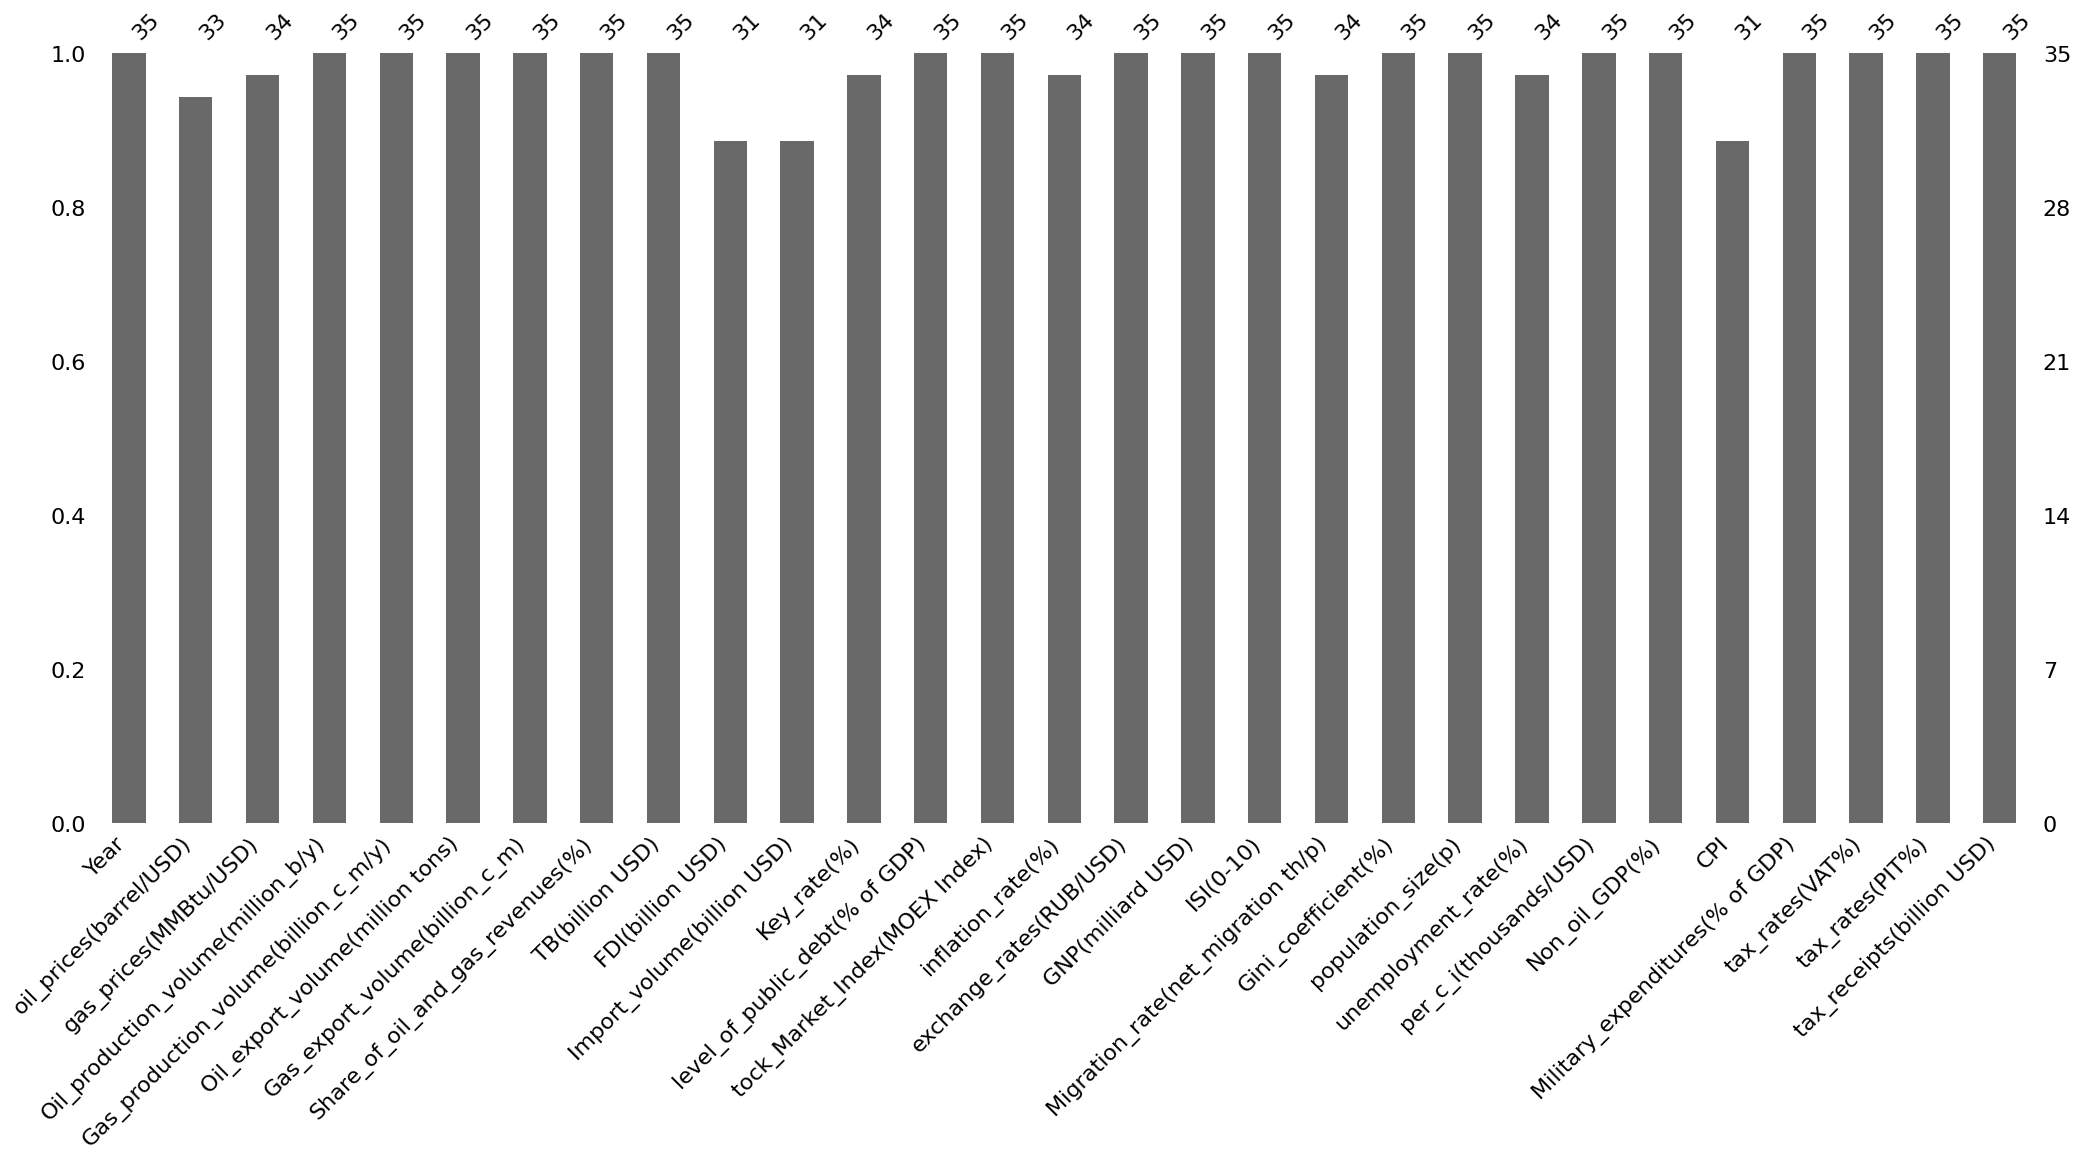

In [81]:
# Проверка пропусков
display(df.isnull().sum())

msno.bar(df)

In [82]:
df_null = df[["oil_prices(barrel/USD)", "gas_prices(MMBtu/USD)", "FDI(billion USD)", 
                   "Import_volume(billion USD)", "Key_rate(%)", "inflation_rate(%)", 
                   "Migration_rate(net_migration th/p)", "unemployment_rate(%)", "CPI"]]

for column in df_null.columns:
    median_value = df_null[column].median()
    df_null[column].fillna(median_value, inplace=True)

display(df_null.isnull().sum())
df.update(df_null)
df["Key_rate(%)"] = df["Key_rate(%)"].round(2)
df

C:\Users\arsdo\AppData\Local\Temp\ipykernel_14920\3247168393.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_null[column].fillna(median_value, inplace=True)
C:\Users\arsdo\AppData\Local\Temp\ipykernel_14920\3247168393.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null[column].fillna(median_value, inplace=True)
C:\Users\arsdo\Ap

oil_prices(barrel/USD)                0
gas_prices(MMBtu/USD)                 0
FDI(billion USD)                      0
Import_volume(billion USD)            0
Key_rate(%)                           0
inflation_rate(%)                     0
Migration_rate(net_migration th/p)    0
unemployment_rate(%)                  0
CPI                                   0
dtype: int64

,Year,oil_prices(barrel/USD),gas_prices(MMBtu/USD),Oil_production_volume(million_b/y),Gas_production_volume(billion_c_m/y),Oil_export_volume(million tons),Gas_export_volume(billion_c_m),Share_of_oil_and_gas_revenues(%),TB(billion USD),FDI(billion USD),...,Gini_coefficient(%),population_size(p),unemployment_rate(%),per_c_i(thousands/USD),Non_oil_GDP(%),CPI,Military_expenditures(% of GDP),tax_rates(VAT%),tax_rates(PIT%),tax_receipts(billion USD)
0,1991,26.05,1.76,10.340,643.0,129.5,210.0,18,10.30,15000.0,...,26.0,148390433,5.0,3.19,82.0,2.6,5.1,28.0,12–60,17
1,1992,16.55,1.40,2.925,641.0,111.8,200.0,20,10.30,15000.0,...,29.0,148915991,5.2,10.10,80.0,2.6,4.8,28.1,12–60,18
2,1993,16.30,1.80,2.595,618.0,99.2,190.0,22,10.30,15000.0,...,40.0,148135424,5.9,8.80,81.0,2.6,7.0,28.2,12–50,15
3,1994,12.35,1.60,2.331,607.0,88.9,185.0,18,10.30,-500.0,...,41.0,148200736,8.1,8.80,80.0,2.6,6.5,28.3,12–45,14
4,1995,16.40,1.50,2.250,595.0,85.9,180.0,16,10.30,-2000.0,...,38.0,148291403,8.3,9.10,79.0,2.4,6.0,28.4,12–40,13
5,1996,19.47,1.90,2.206,601.0,84.2,182.0,18,10.30,2000.0,...,46.1,148084582,9.3,9.30,78.0,2.6,5.5,28.5,12–35,12
6,1997,20.50,2.10,2.243,571.0,85.6,175.0,19,10.30,4000.0,...,38.4,147853771,10.8,10.50,77.0,2.3,4.0,28.6,12–35,11
7,1998,12.00,1.80,2.221,591.0,84.7,178.0,15,10.30,0.0,...,38.1,147635531,11.9,8.50,79.0,2.4,3.5,28.7,12–35,8
8,1999,18.50,2.20,2.236,592.0,85.3,180.0,20,10.30,2000.0,...,37.4,147241975,13.0,7.00,81.0,2.2,4.2,28.8,12–30,10
9,2000,26.20,3.60,2.375,585.0,90.6,185.0,27,58.35,1000.0,...,37.1,146717782,10.6,8.50,79.0,2.4,5.4,28.9,12–30,15


In [83]:
def process_rates(val):
    if pd.isnull(val):
        return pd.Series([None, None])
    val = str(val)
    
    val = val.replace("–", "").replace("—", "").replace("-", "")
    
    if len(val) > 2:
        return pd.Series([float(val[:2]), float(val[2:])])
    else:
        return pd.Series([float(val), float(val)])
    
df[["PIT_min", "PIT_max"]] = df['tax_rates(PIT%)'].apply(process_rates)
df.drop(columns=["tax_rates(PIT%)"], inplace=True)
df['PIT_min']



0     12.0
1     12.0
2     12.0
3     12.0
4     12.0
5     12.0
6     12.0
7     12.0
8     12.0
9     12.0
10    13.0
11    13.0
12    13.0
13    13.0
14    13.0
15    13.0
16    13.0
17    13.0
18    13.0
19    13.0
20    13.0
21    13.0
22    13.0
23    13.0
24    13.0
25    13.0
26    13.0
27    13.0
28    13.0
29    13.0
30    13.0
31    13.0
32    13.0
33    13.0
34    13.0
Name: PIT_min, dtype: float64

In [84]:
#Увеличение размера датасета

n_series = 6

rng = np.random.default_rng(42)

noise_plan = {
    "oil_prices(barrel/USD)":   ("mul", 0.08),
    "gas_prices(MMBtu/USD)":    ("mul", 0.10),
    "Oil_production_volume(million_b/y)": ("add", 0.02),
    "Gas_production_volume(billion_c_m/y)": ("add", 0.02),
    "Oil_export_volume(million tons)":     ("add", 0.03),
    "Gas_export_volume(billion_c_m)":      ("add", 0.03),
    "Share_of_oil_and_gas_revenues(%)":    ("add", 0.05),
    "TB(billion USD)":          ("add", 0.10),
    "FDI(billion USD)":         ("add", 0.15),
    "Import_volume(billion USD)": ("add", 0.08),
    "Key_rate(%)":              ("add", 0.07),
    "level_of_public_debt(% of GDP)": ("add", 0.05),
    "tock_Market_Index(MOEX Index)": ("mul", 0.12),
    "inflation_rate(%)":        ("add", 0.08),
    "exchange_rates(RUB/USD)":  ("mul", 0.10),
    "GNP(milliard USD)":        ("mul", 0.10),
    "ISI(0-10)":                ("add", 0.05),
    "Migration_rate(net_migration th/p)": ("add", 0.20),
    "Gini_coefficient(%)":      ("add", 0.03),
    "population_size(p)":       ("add", 0.005),
    "unemployment_rate(%)":     ("add", 0.05),
    "per_c_i(thousands/USD)":   ("mul", 0.10),
    "Non_oil_GDP(%)":           ("add", 0.03),
    "CPI":                      ("mul", 0.05),
    "Military_expenditures(% of GDP)": ("add", 0.03),
    "tax_rates(VAT%)":          ("add", 0.02),
    "tax_rates(PIT%)":          ("add", 0.02),
    "tax_receipts(billion USD)": ("mul", 0.10),
}

cols = [c for c in noise_plan.keys() if c in df.columns]
base = df[cols].copy()

def add_noise_block(values: pd.DataFrame, series_id: int) -> pd.DataFrame:
    noisy = values.copy()
    for c in cols:
        mode, sigma = noise_plan[c]
        if mode == "mul":
            # V' = V * (1 + N(0, sigma))
            eps = rng.normal(0.0, sigma, size=noisy.shape[0])
            noisy[c] = noisy[c] * (1.0 + eps)
        else:
            # V' = V + N(0, sigma * scale)
            # выберем scale = std по колонке (устойчиво к масштабу)
            col_std = values[c].std(ddof=1)
            scale = (col_std if np.isfinite(col_std) and col_std > 0 else max(1.0, values[c].mean()))
            eps = rng.normal(0.0, sigma * scale, size=noisy.shape[0])
            noisy[c] = noisy[c] + eps
    noisy["series_id"] = series_id
    return noisy

aug_parts = [base.assign(series_id=0)]
for sid in range(1, n_series + 1):
    aug_parts.append(add_noise_block(base, sid))

aug_df = pd.concat(aug_parts, axis=0)
aug_df.index.name = df.index.name  # 'Year'

bounds = {
    "Share_of_oil_and_gas_revenues(%)": (0, 100),
    "Key_rate(%)": (0, 100),
    "inflation_rate(%)": (0, 100),
    "Gini_coefficient(%)": (0, 100),
    "unemployment_rate(%)": (0, 100),
    "Non_oil_GDP(%)": (0, 100),
    "Military_expenditures(% of GDP)": (0, 100),
    "tax_rates(VAT%)": (0, 100),
    "tax_rates(PIT%)": (0, 100),
    "population_size(p)": (0, None),
    "CPI": (0, None),
    "oil_prices(barrel/USD)": (0, None),
    "gas_prices(MMBtu/USD)": (0, None),
    "exchange_rates(RUB/USD)": (0, None),
    "FDI(billion USD)": (None, None), 
    "TB(billion USD)": (None, None),   
}
for c, (lo, hi) in bounds.items():
    if c in aug_df.columns:
        aug_df[c] = aug_df[c].clip(lower=lo, upper=hi)

round_2 = [
    "oil_prices(barrel/USD)", "gas_prices(MMBtu/USD)",
    "Key_rate(%)", "inflation_rate(%)", "exchange_rates(RUB/USD)",
    "unemployment_rate(%)", "Gini_coefficient(%)", "Share_of_oil_and_gas_revenues(%)"

]

for c in round_2:
    if c in aug_df.columns:
        aug_df[c] = aug_df[c].round(2)

other_cols = [c for c in df.columns if c not in cols]
df_final = aug_df.join(df[other_cols], how="left") 

print(df_final.shape)
df_final.reset_index(drop=True,inplace=True)

(245, 31)


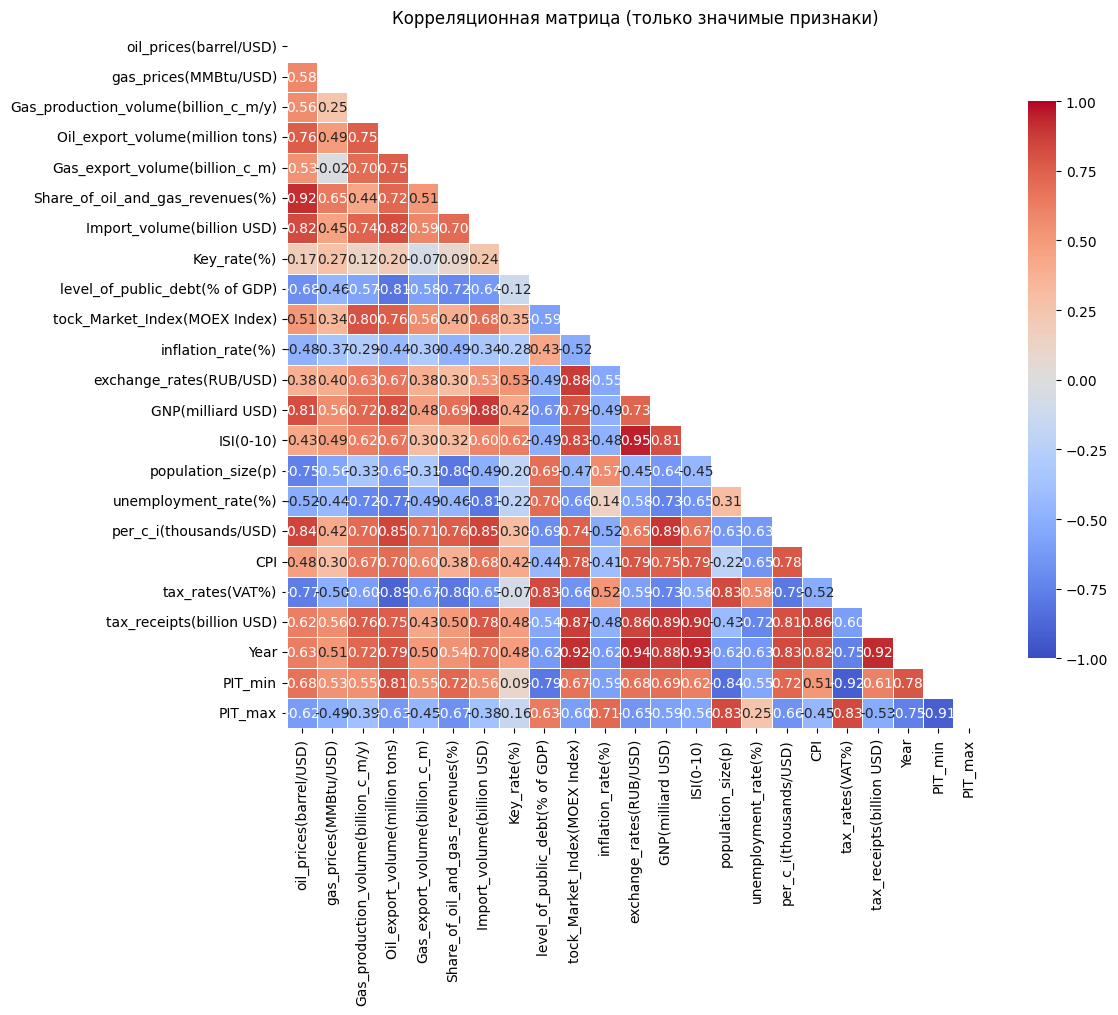

In [96]:
#Проверка 
import seaborn as sns

corr_with_target = df_final.corr(numeric_only=True)["Year"].abs()

threshold = 0.4
selected_features = corr_with_target[corr_with_target > threshold].index.tolist()

matrix_filtered = df_final[selected_features].corr(numeric_only=True)

mask = np.triu(np.ones_like(matrix_filtered, dtype=bool))

# Строим heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    matrix_filtered,
    mask=mask,
    annot=True,         
    fmt=".2f",         
    linewidths=0.5,
    cmap="coolwarm",     
    vmin=-1, vmax=1,
    center=0,            
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title("Корреляционная матрица (только значимые признаки)")
plt.tight_layout()
plt.show()


## Разделение на тестовую и обучающую выборку

In [97]:
from sklearn.model_selection import train_test_split

df_final = df_final.drop("Year", axis=1)
X = df_final.drop("tax_receipts(billion USD)",axis=1)
y = df_final['tax_receipts(billion USD)']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Обучение моделей

## Линейная регрессия

In [98]:
#Мастштабирование данных для модели
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [99]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(X_train_scaled,y_train)
y_pred = lin_reg.predict(X_test_scaled)
print(y_pred[:10])
score = lin_reg.score(X_test_scaled, y_test)
print(f"R-squared: {score}")

[159.35687256  15.22154191  34.26335673  12.78974661 149.2785013
  16.3283518   63.34125635 120.78431612  12.16760377 420.05749096]
R-squared: 0.9774207568776376


### Графики предсказаний

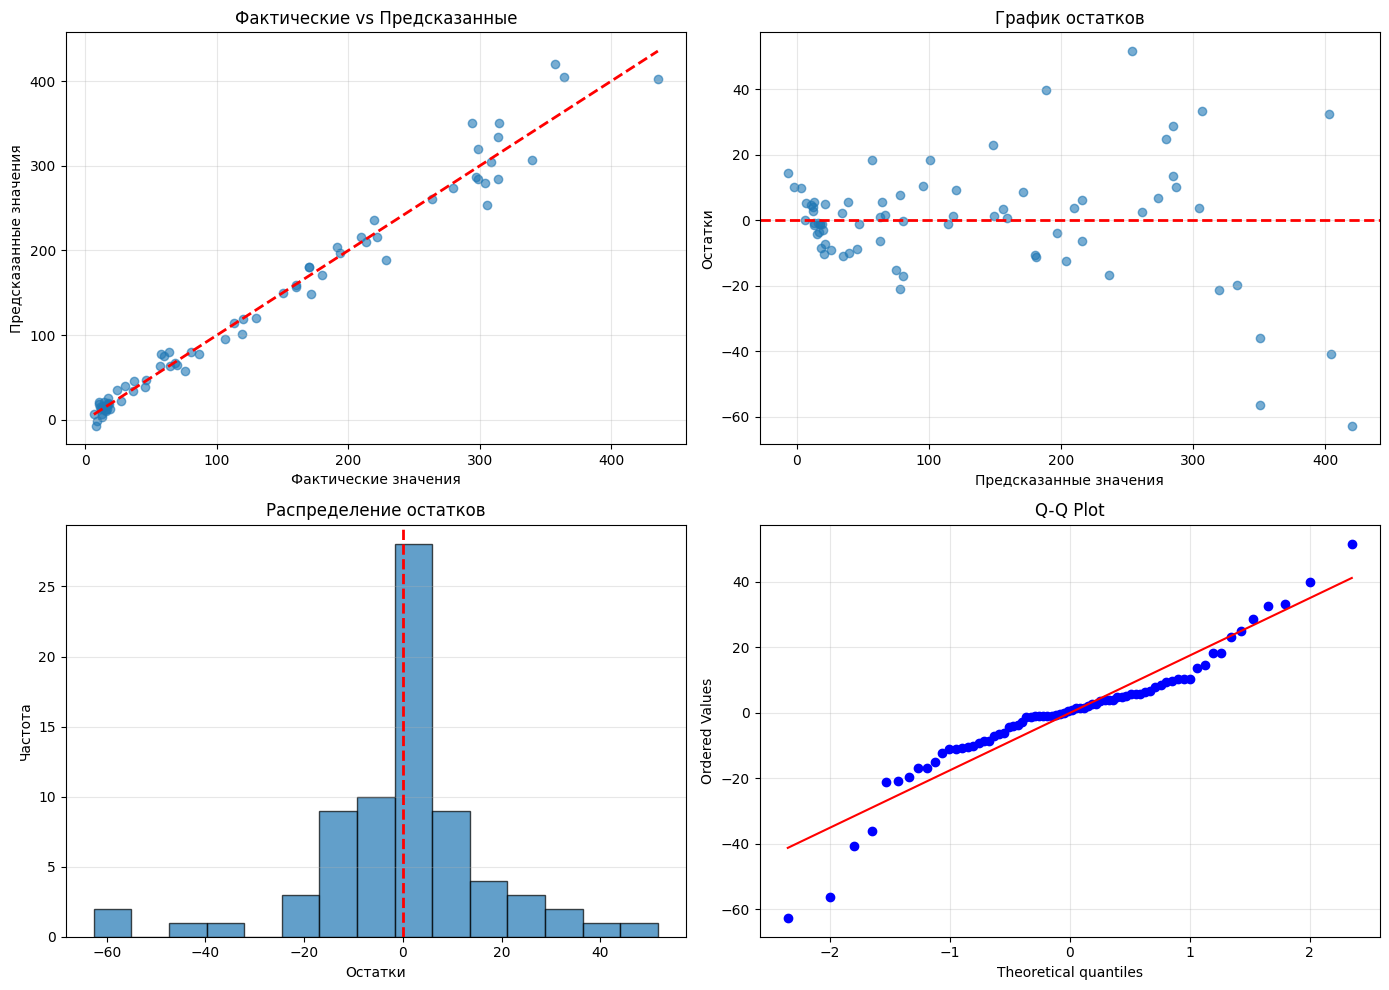

In [100]:
from scipy import stats
fig, axes = plt.subplots(2, 2, figsize=(14, 10))


axes[0, 0].scatter(y_test, y_pred, alpha=0.6)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Фактические значения')
axes[0, 0].set_ylabel('Предсказанные значения')
axes[0, 0].set_title('Фактические vs Предсказанные')
axes[0, 0].grid(True, alpha=0.3)


residuals = y_test - y_pred
axes[0, 1].scatter(y_pred, residuals, alpha=0.6)
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Предсказанные значения')
axes[0, 1].set_ylabel('Остатки')
axes[0, 1].set_title('График остатков')
axes[0, 1].grid(True, alpha=0.3)


axes[1, 0].hist(residuals, bins=15, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Остатки')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].set_title('Распределение остатков')
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 0].grid(True, alpha=0.3, axis='y')


stats.probplot(residuals, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Численные метрики

In [102]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# R-квадрат (коэффициент детерминации)
r2 = r2_score(y_test, y_pred)
print(f"R² = {r2:.4f}")  # От 0 до 1, чем больше, тем лучше

# Среднеквадратичная ошибка (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE = {rmse:.4f}")

# Средняя абсолютная ошибка (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE = {mae:.4f}")

# Средняя абсолютная процентная ошибка (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE = {mape:.4f}%")

R² = 0.9774
RMSE = 17.8946
MAE = 11.8903
MAPE = 19.8514%


### Судя по графикам можно придти к выводу, что модель хорошо справляется на небольших числловых данных, но чем большими становятся поступления - тем менее точными становятся предсказания 

## Random Forest Regression

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [104]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=1
).fit(X_train, y_train)

y_pred_rfreg = rf_reg.predict(X_test)

print(f"R² = {r2_score(y_test, y_pred_rfreg):.4f}")
print(f"RMSE = {np.sqrt(mean_squared_error(y_test, y_pred_rfreg)):.4f}")

R² = 0.9898
RMSE = 12.3696


In [117]:
#важность признаков 
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_reg.feature_importances_
}).sort_values('importance', ascending=False)

print("10 самых важных признаков")
print(feature_importance.head(10))
matr = X_train.corr(numeric_only=True)
print(matr)



10 самых важных признаков
                            feature  importance
23                              CPI    0.659701
21           per_c_i(thousands/USD)    0.131880
28                          PIT_max    0.072228
22                   Non_oil_GDP(%)    0.020500
0            oil_prices(barrel/USD)    0.017830
15                GNP(milliard USD)    0.015345
19               population_size(p)    0.015190
4   Oil_export_volume(million tons)    0.014551
9        Import_volume(billion USD)    0.010939
11   level_of_public_debt(% of GDP)    0.006619
                                      oil_prices(barrel/USD)  \
oil_prices(barrel/USD)                              1.000000   
gas_prices(MMBtu/USD)                               0.609553   
Oil_production_volume(million_b/y)                  0.198578   
Gas_production_volume(billion_c_m/y)                0.550626   
Oil_export_volume(million tons)                     0.741679   
Gas_export_volume(billion_c_m)                      0.549175  

### Слишком высокая важность признака Year что объясняет высокую предсказательную возможность модели, удаляем её и проводим итерацию